<a href="https://colab.research.google.com/github/sonyerim/DPR/blob/main/car_bus_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[2024 DPR Proj] IT공학전공-4학년-2113181-손예림

자동차와 버스 구분 CNN

In [ ]:
!pip install tensorflow keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/sonyerim/DPR.git

Cloning into 'DPR'...
remote: Enumerating objects: 1104, done.
remote: Counting objects: 100% (1104/1104), done.
remote: Compressing objects: 100% (1102/1102), done.
remote: Total 1104 (delta 0), reused 1101 (delta 0), pack-reused 0
Receiving objects: 100% (1104/1104), 24.99 MiB | 24.56 MiB/s, done.


In [ ]:
base_dir = '/content/DPR/images'
car_dir = os.path.join(base_dir, 'car')
bus_dir = os.path.join(base_dir, 'bus')

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Found 877 images belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 219 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20
)

Epoch 1/20
27/27 [==============================] - 51s 2s/step - loss: 0.7439 - accuracy: 0.6083 - val_loss: 0.4651 - val_accuracy: 0.8594
Epoch 2/20
27/27 [==============================] - 56s 2s/step - loss: 0.3881 - accuracy: 0.8414 - val_loss: 0.2417 - val_accuracy: 0.9167
Epoch 3/20
27/27 [==============================] - 52s 2s/step - loss: 0.2255 - accuracy: 0.9065 - val_loss: 0.2526 - val_accuracy: 0.8906
Epoch 4/20
27/27 [==============================] - 52s 2s/step - loss: 0.1999 - accuracy: 0.9183 - val_loss: 0.2289 - val_accuracy: 0.9219
Epoch 5/20
27/27 [==============================] - 53s 2s/step - loss: 0.1647 - accuracy: 0.9325 - val_loss: 0.2041 - val_accuracy: 0.9271
Epoch 6/20
27/27 [==============================] - 53s 2s/step - loss: 0.1070 - accuracy: 0.9633 - val_loss: 0.2332 - val_accuracy: 0.9010
Epoch 7/20
27/27 [==============================] - 54s 2s/step - loss: 0.0938 - accuracy: 0.9621 - val_loss: 0.1620 - val_accuracy: 0.9271
Epoch 8/20
27/27 [==

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

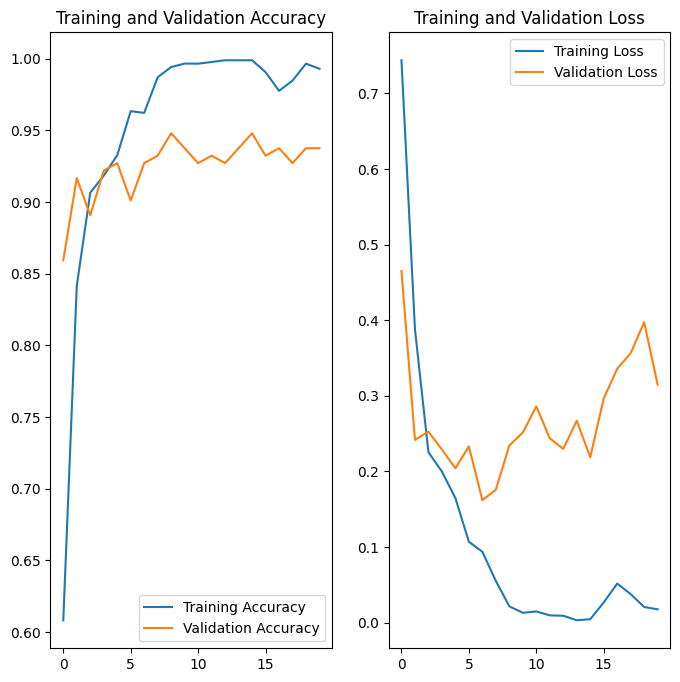

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()